In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cluster_mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
388,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
389,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
390,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 27.7+ KB


In [16]:
df = pd.get_dummies(data=df.drop(columns='name'))
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [18]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

scaled = scale.fit_transform(df)

scaled

array([[0.2393617 , 1.        , 0.61757106, ..., 0.        , 0.        ,
        1.        ],
       [0.15957447, 1.        , 0.72868217, ..., 0.        , 0.        ,
        1.        ],
       [0.2393617 , 1.        , 0.64599483, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.61170213, 0.2       , 0.17312661, ..., 0.        , 0.        ,
        1.        ],
       [0.50531915, 0.2       , 0.13436693, ..., 0.        , 0.        ,
        1.        ],
       [0.58510638, 0.2       , 0.13178295, ..., 0.        , 0.        ,
        1.        ]])

In [20]:
scaled_df = pd.DataFrame(scaled, columns=df.columns)
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
387,0.478723,0.2,0.186047,0.217391,0.333711,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.2,0.074935,0.032609,0.146583,0.988095,1.0,1.0,0.0,0.0
389,0.611702,0.2,0.173127,0.206522,0.193365,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.2,0.134367,0.179348,0.286929,0.630952,1.0,0.0,0.0,1.0


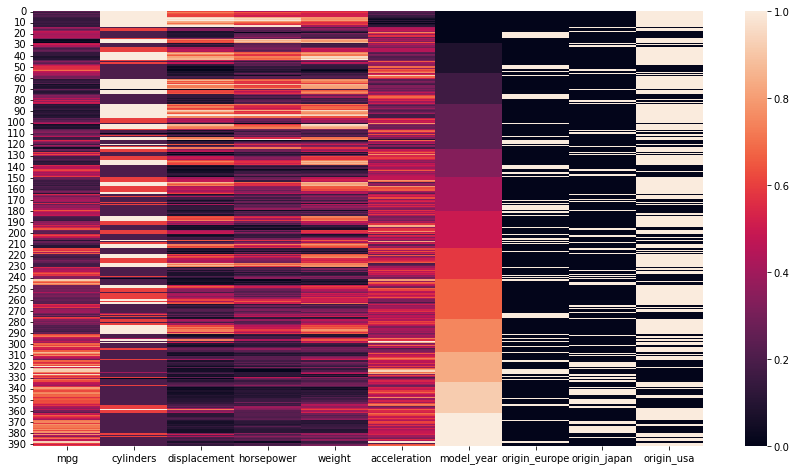

In [43]:
plt.figure(figsize=(15,8))
sns.heatmap(scaled_df);

<Figure size 1080x576 with 0 Axes>

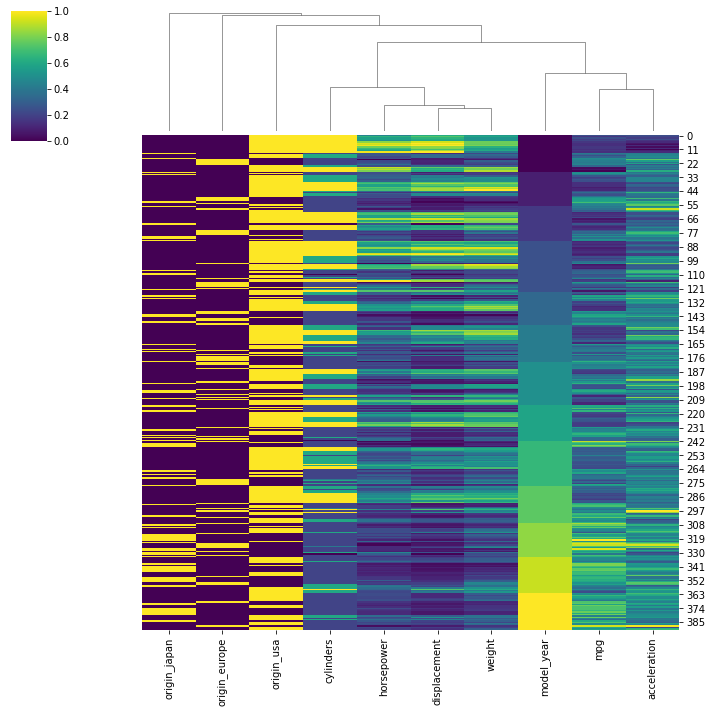

In [26]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,cmap='viridis',row_cluster=False);

<Figure size 1080x576 with 0 Axes>

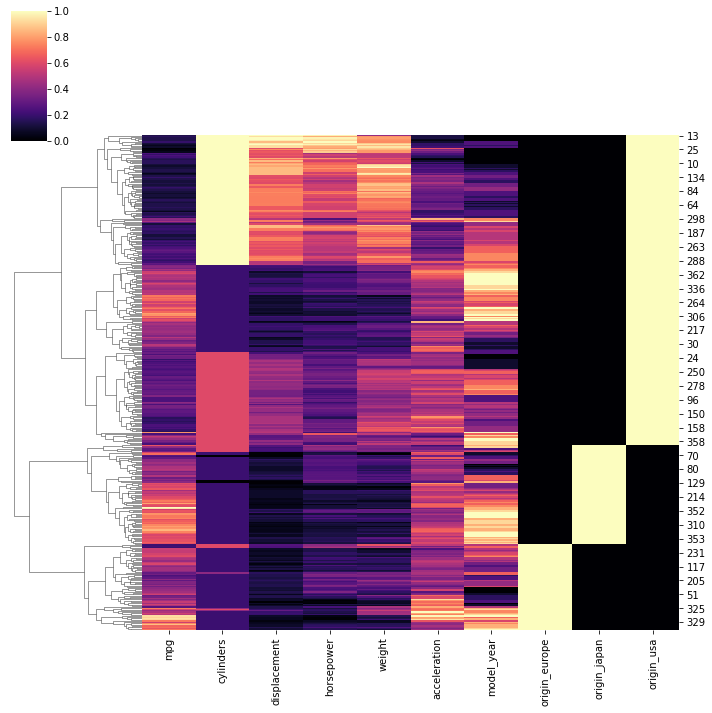

In [42]:
plt.figure(figsize=(15,8))
sns.clustermap(scaled_df,cmap='magma',row_cluster=True,col_cluster=False);

In [36]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)

cluster_labels = model.fit_predict(scaled_df)

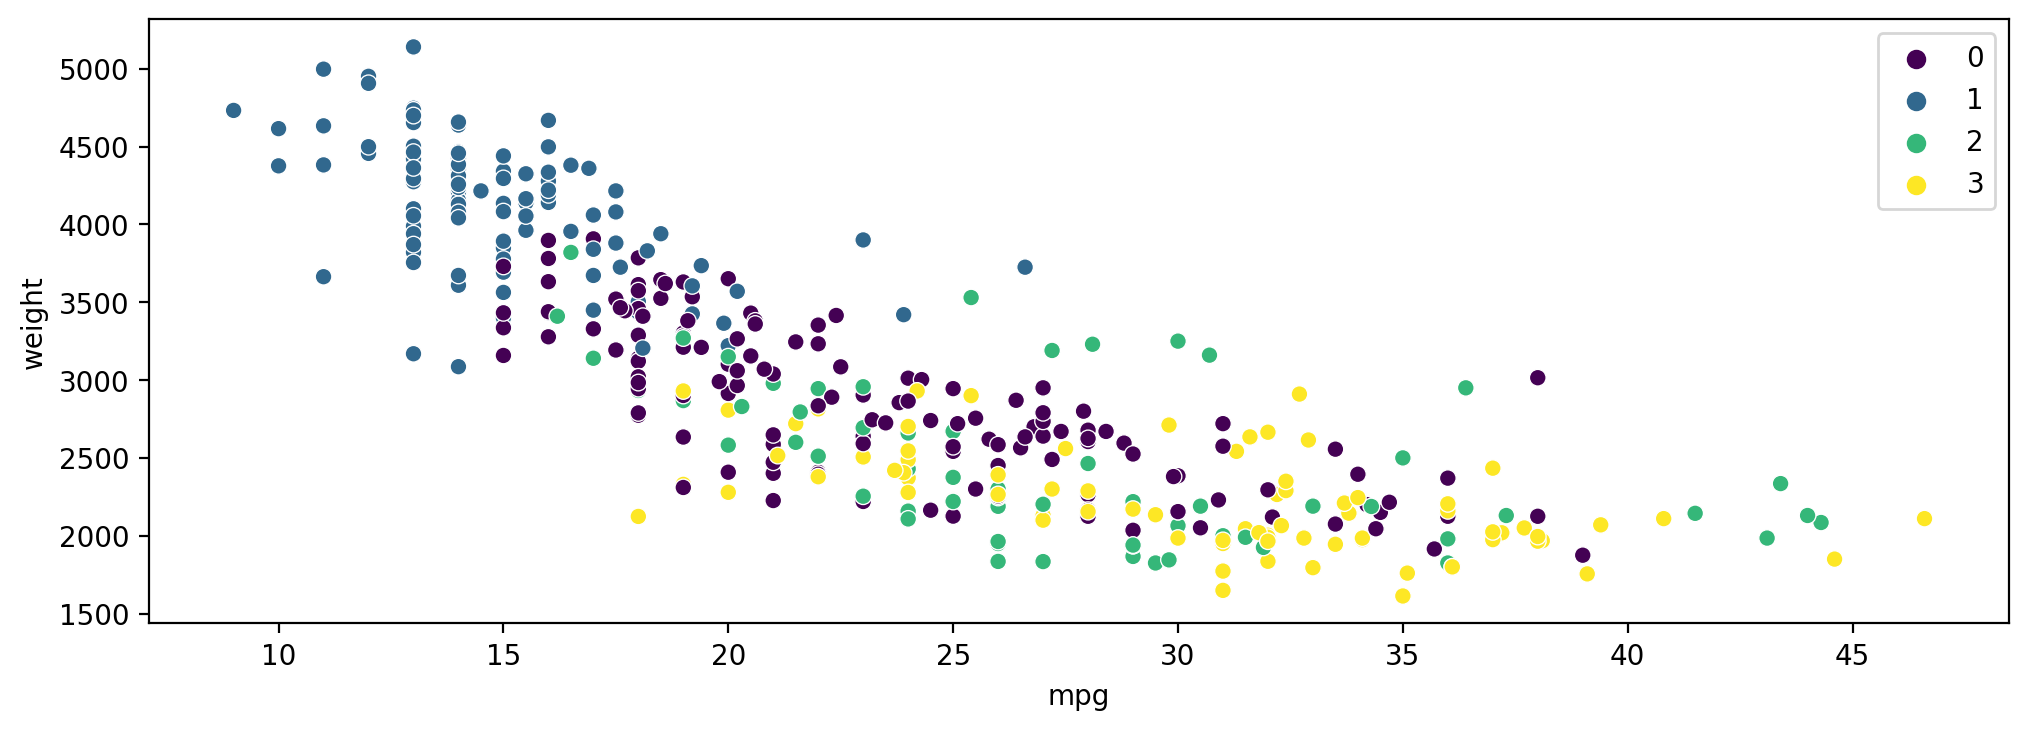

In [41]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels,palette='viridis');

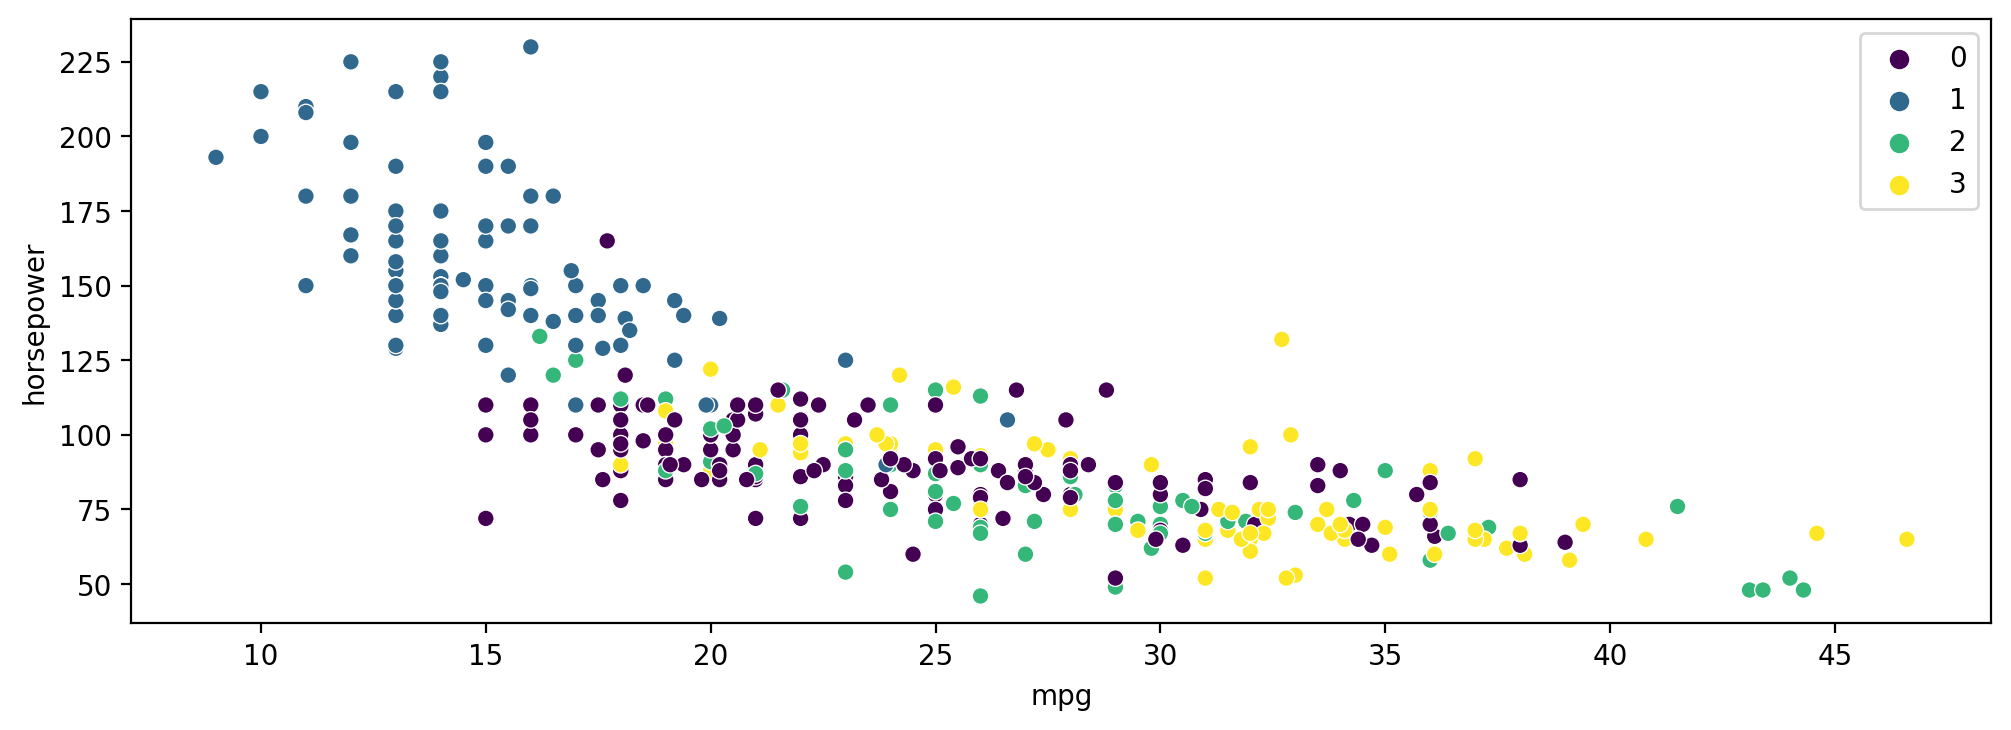

In [44]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='horsepower',hue=cluster_labels,palette='viridis');

**Levando em conta que a distância Euclidiana é calculada pelo Teorema de Pitágoras e o Dataset possui apenas 10 features. A distância máxima entre dois pontos será a Raíz Quadrada de 10, ou seja, 3.16. Entretanto, isso se deve ao fato das variáveis terem sido escalonadas pelo método MinMaxScaler, pois este escalona as variáveis em valores entre 0 e 1.**

In [55]:
np.sqrt(len(scaled_df.columns))

3.1622776601683795

In [47]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

cluster_labels = model.fit_predict(scaled_df)

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

linkage_matrix = hierarchy.linkage(model.children_)

In [49]:
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [48]:
# Essa matriz mostra a localização do ponto um, localização do ponto dois,
# distancia entre os dois pontos e quantos pontos pertencem ao cluster
# vai aumentando o cluster até atinjir todos os pontos
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

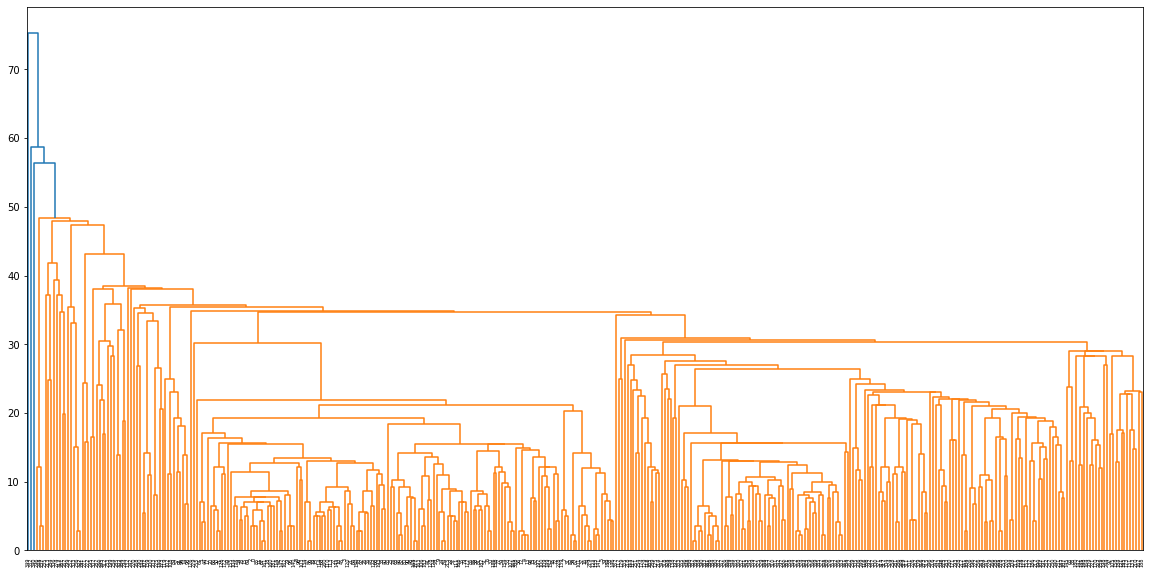

In [50]:
plt.figure(figsize=(20,10))
dendo = dendrogram(linkage_matrix)

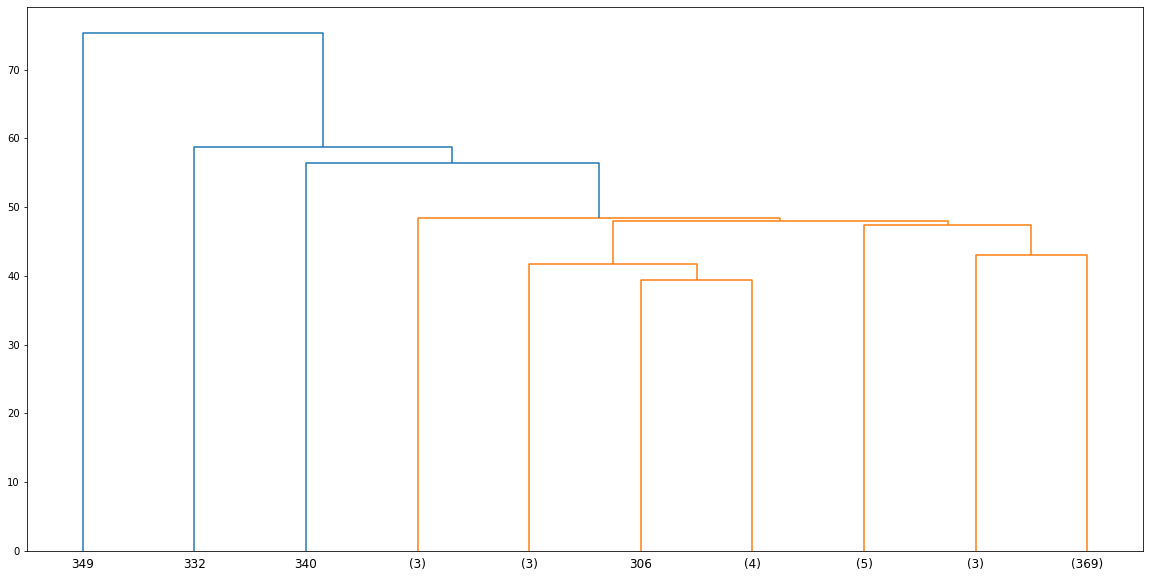

In [52]:
plt.figure(figsize=(20,10))
dendo = dendrogram(linkage_matrix,truncate_mode='lastp',p=10);

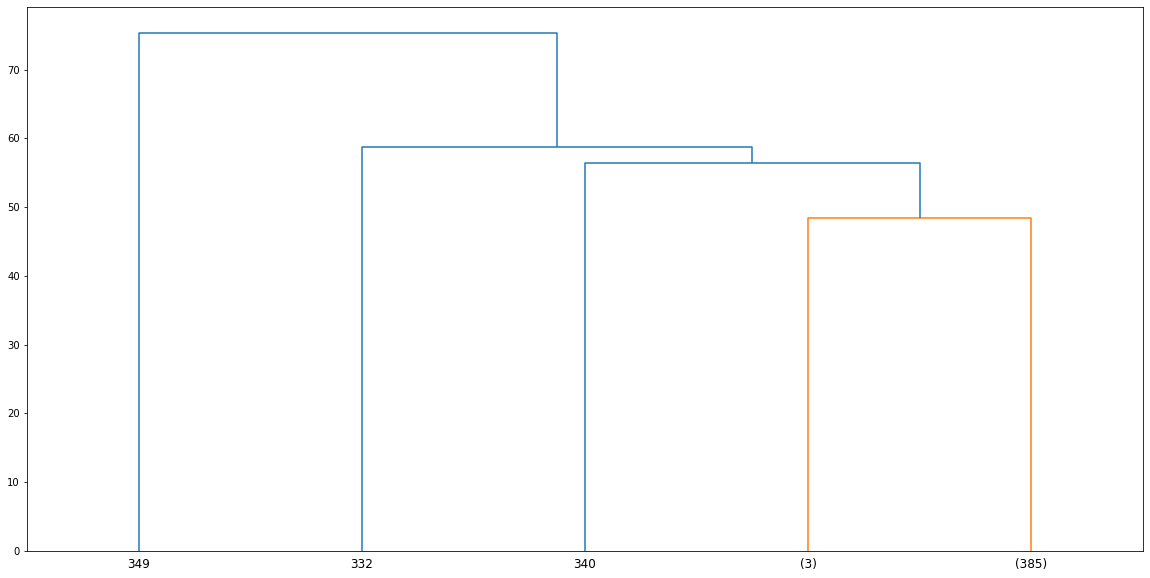

In [53]:
plt.figure(figsize=(20,10))
dendo = dendrogram(linkage_matrix,truncate_mode='level',p=3);

### Caculando distância máxima real entre dois pontos

In [59]:
car_a = scaled_df.iloc[scaled_df['mpg'].idxmax()]

In [60]:
car_b = scaled_df.iloc[scaled_df['mpg'].idxmin()]

In [61]:
distance = np.linalg.norm(car_a-car_b)
distance

2.3852929970374714

**Apesar do valor calculado no ínicio baseado na quantidade de Features ser mais alto, o valor real baseado na subtração do ponto com valor máximo e mínimo de uma Feature foi menor, 2.38.**

# Utilizando K-Means para Clusterização no mesmo dataset

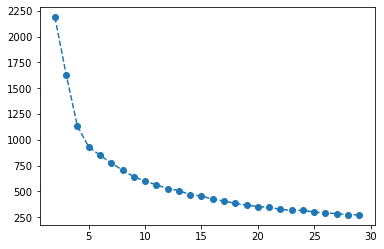

In [63]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_StandarS = scaler.fit_transform(df)

ssd=[]

for k in range(2,30):
    model = KMeans(n_clusters=k)
    model.fit(df_StandarS)
    ssd.append(model.inertia_)
    
    
plt.plot(range(2,30),ssd,'o--');

In [66]:
model = KMeans(n_clusters=5)
label_cluster = model.fit_predict(df_StandarS)
df['cluster'] = label_cluster
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa,cluster
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790,15.6,82,0,0,1,1
388,44.0,4,97.0,52.0,2130,24.6,82,1,0,0,2
389,32.0,4,135.0,84.0,2295,11.6,82,0,0,1,1
390,28.0,4,120.0,79.0,2625,18.6,82,0,0,1,1


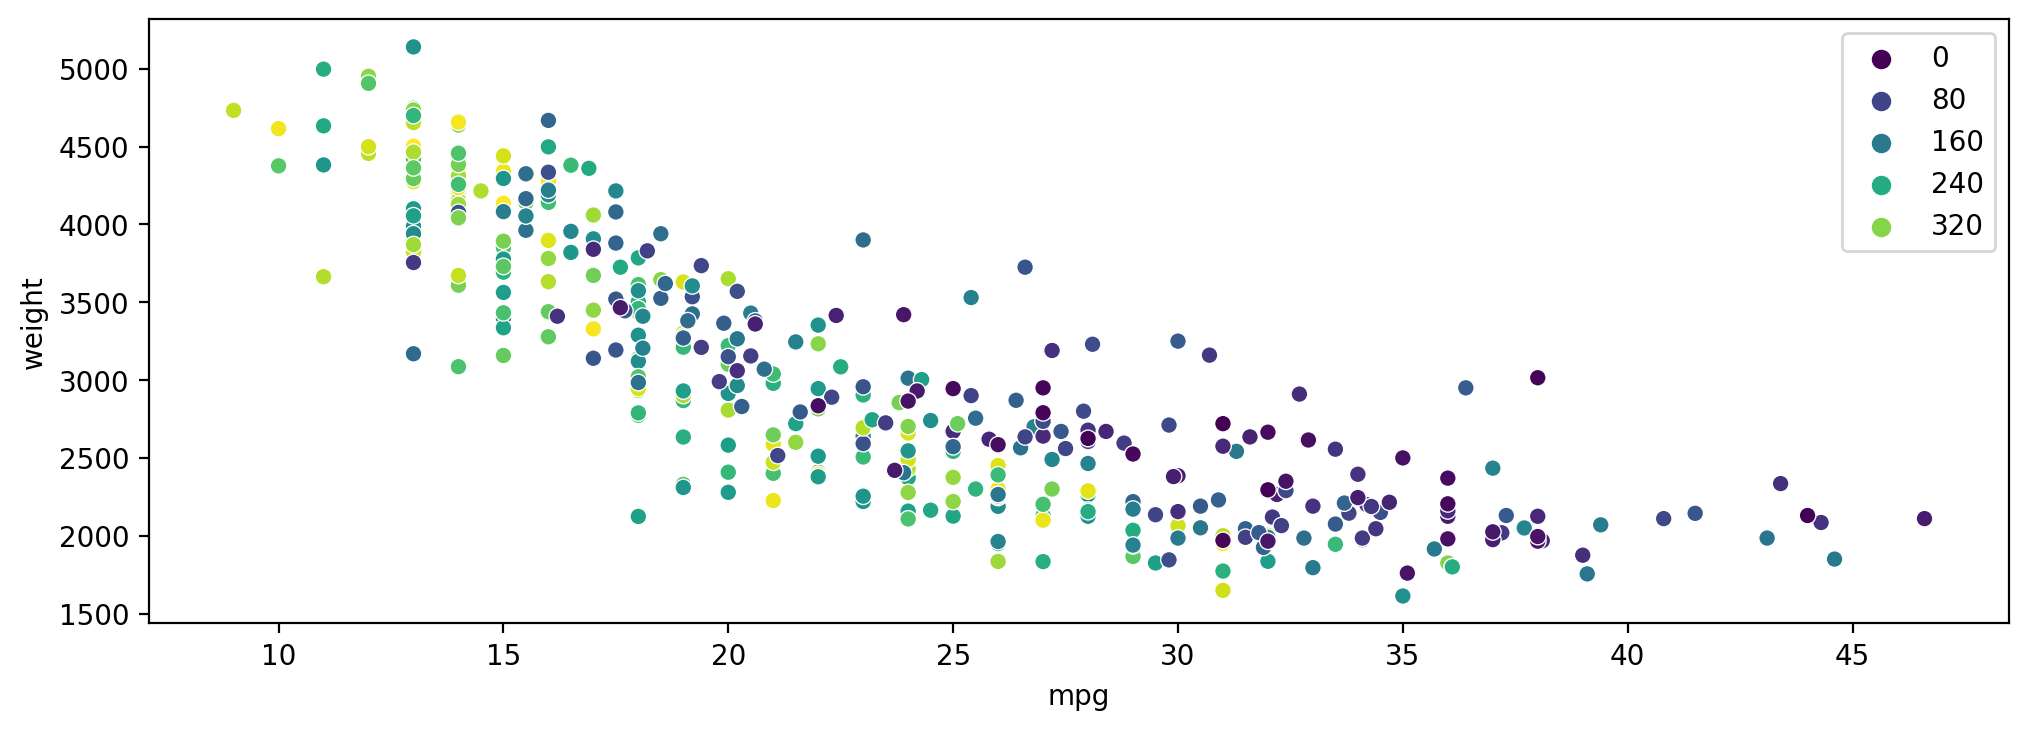

In [67]:
plt.figure(figsize=(12,4),dpi=200)
sns.scatterplot(data=df,x='mpg',y='weight',hue=cluster_labels,palette='viridis');

In [68]:
df['cluster'].value_counts()

0    94
3    79
4    77
1    74
2    68
Name: cluster, dtype: int64

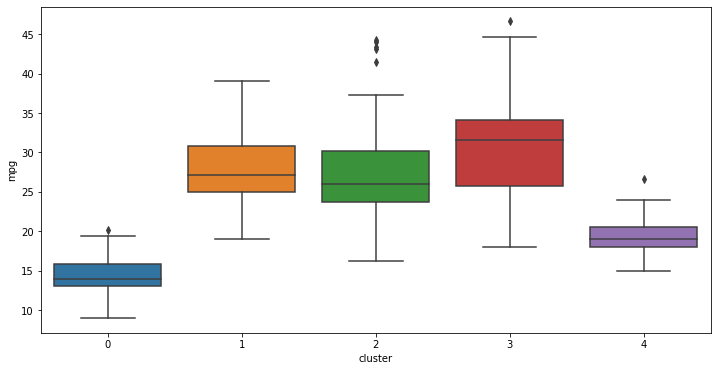

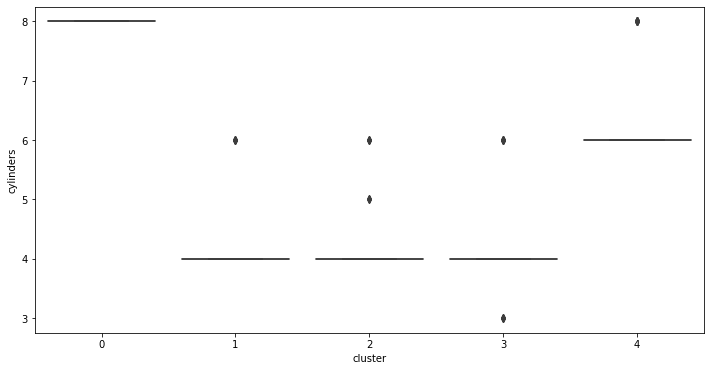

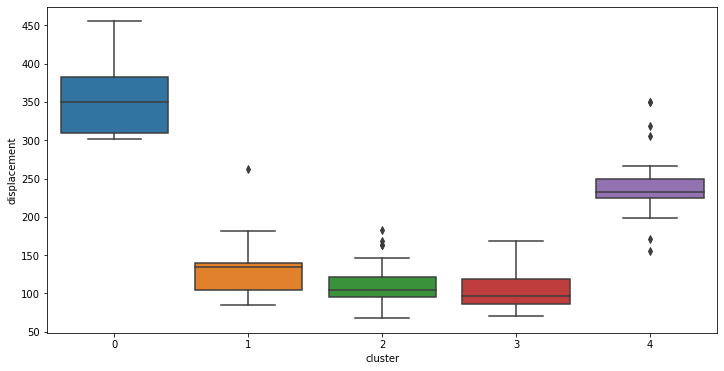

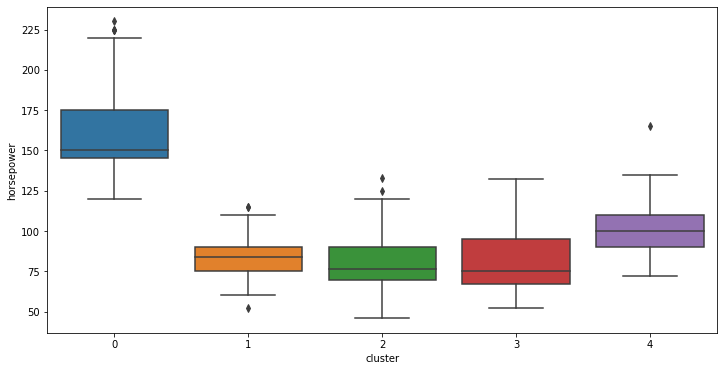

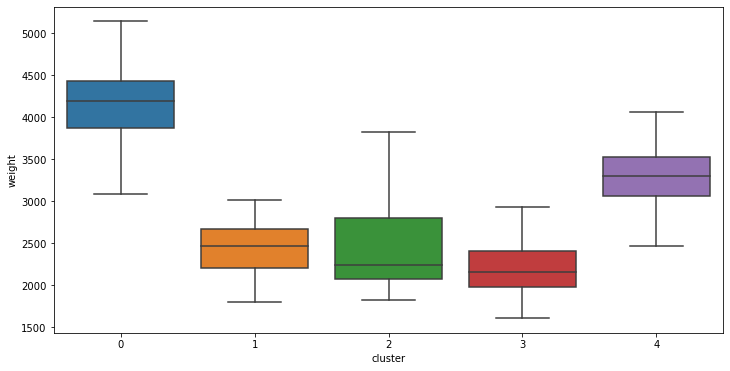

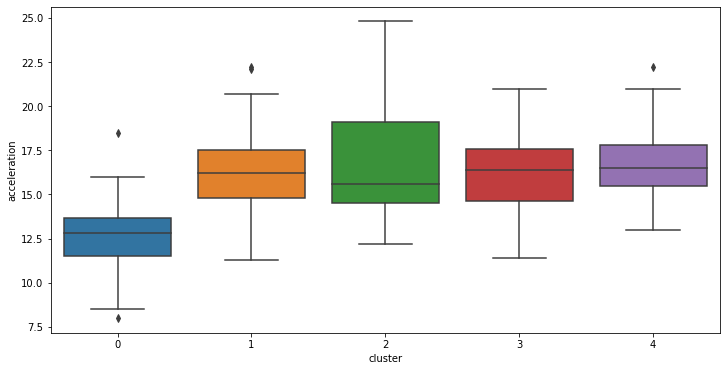

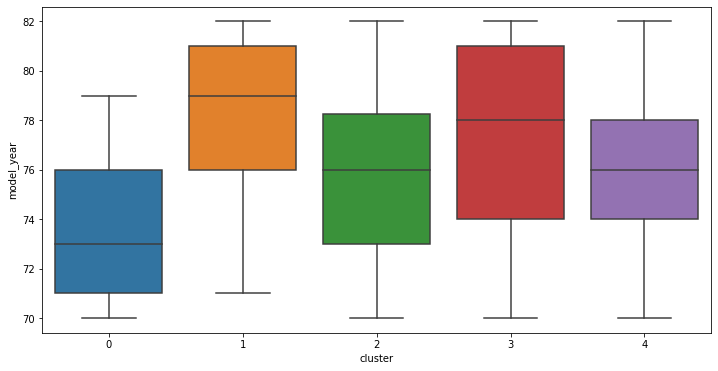

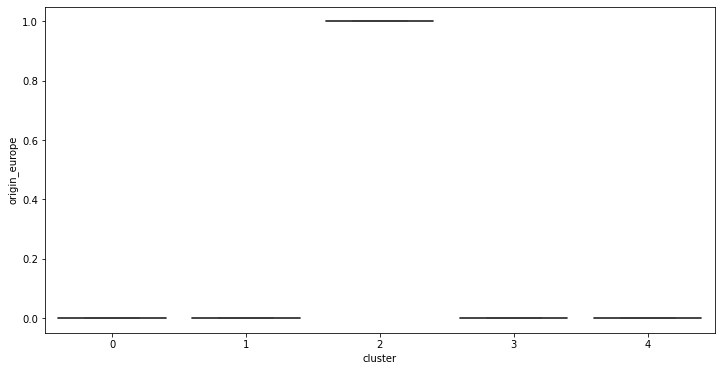

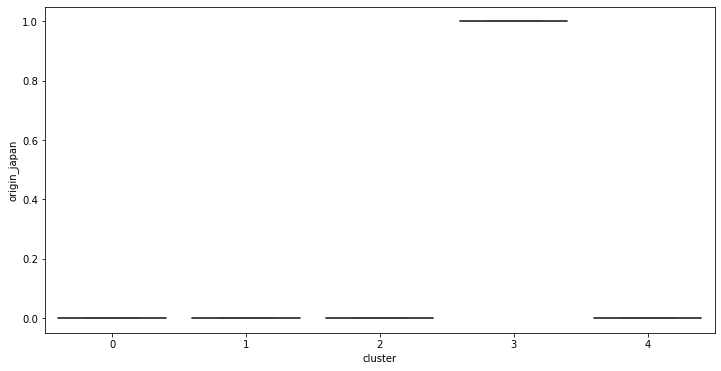

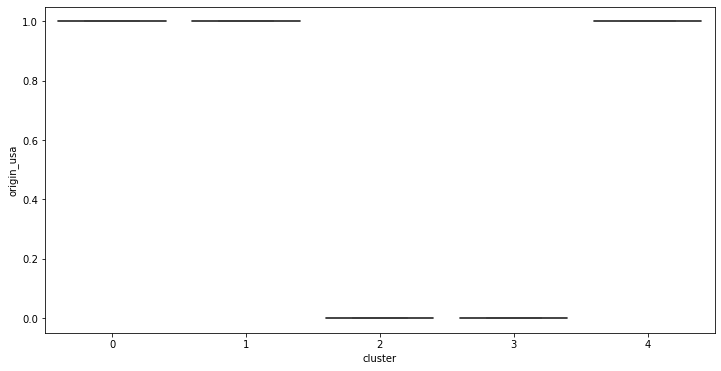

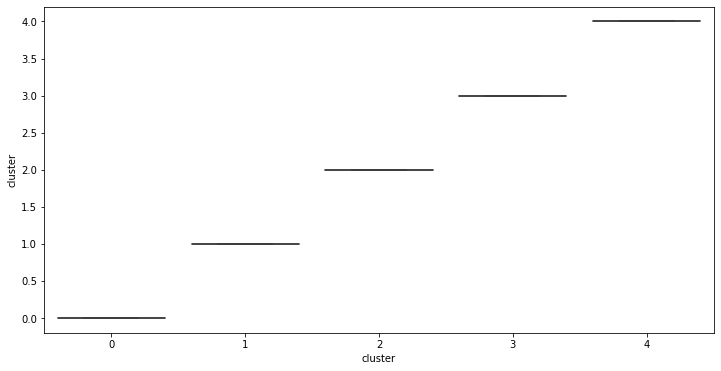

In [71]:
features = df.columns

for feature in features:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df, y=feature, x='cluster')
    plt.show()